In [250]:
import torch
import numpy as np

### Using tensors
Creating a tensor from a list

In [251]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)
print(x_data)
print(type(x_data))

tensor([[1, 2],
        [3, 4]])
<class 'torch.Tensor'>


Creating a tensor from a numpy array

In [252]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print("Numpy Array:\n", np_array,"\nTorch tensor:\n", x_np)
print(type(x_np))

Numpy Array:
 [[1 2]
 [3 4]] 
Torch tensor:
 tensor([[1, 2],
        [3, 4]])
<class 'torch.Tensor'>


### Datasets and Dataloaders

In [253]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [254]:
# Loading the training and test data
training_data = datasets.MNIST(
    root="MNISTset",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="MNISTset",
    train=False,
    download=True,
    transform=ToTensor()
)

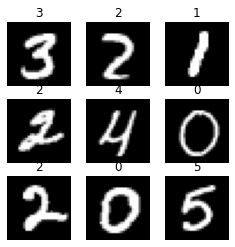

In [255]:
# Visualizing the data
figure = plt.figure(figsize = (4,4))
cols, rows = 3, 3
for i in range(1, cols*rows + 1):
    sample_idx = np.random.randint(len(training_data))
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [256]:
# Using dataloaders to break up the data into minibatches
from torch.utils.data import DataLoader
batchSize = 32
training_dl = DataLoader(training_data, batch_size=batchSize, shuffle=True)
test_dl = DataLoader(test_data, batch_size=batchSize, shuffle=True)
x_train, y_train = next(iter(training_dl))

Mini-batch labels:  [0, 1, 5, 2, 7, 1, 4, 1, 9, 4, 8, 4, 8, 3, 9, 8, 2, 7, 8, 7, 6, 9, 3, 5, 5, 2, 8, 1, 7, 7, 3, 2]


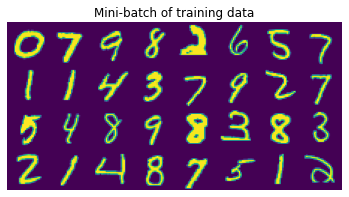

In [257]:
# Visualize a mini batch on a 8x4 grid (when batch size is 32)
plt.axis("off"), plt.title("Mini-batch of training data")
plt.imshow(torch.cat([y for y in x_train.squeeze().reshape([8,28*4,28])], 1))
print("Mini-batch labels: ", [label.item() for label in y_train])

### Building the Neural Network

In [270]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using {} device".format(device))
from torch import nn

Using cpu device


In [349]:
# creating thee Network class
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 16),
            nn.Sigmoid(),
            nn.Linear(16, 16),
            nn.Sigmoid(),
            nn.Linear(16, 10),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.flatten(x)
        y = self.linear_relu_stack(x)
        return y

In [350]:
model = ANN().to(device)
print(model)

ANN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=16, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=16, out_features=10, bias=True)
    (5): Sigmoid()
  )
)


Predicted label:  tensor(1)


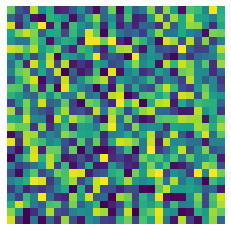

In [397]:
X = torch.rand(1,28,28, device=device)
# X = x_train[0]
plt.axis("off"), plt.imshow(X.reshape(28,28))
yy = nn.Flatten(X)
pred = model(X)
print("Predicted label: ", pred.argmax())